In [63]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

from MCForecastTools import MCSimulation
%matplotlib inline

ModuleNotFoundError: No module named 'alpaca_trade_api'

In [64]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

In [65]:
# Import Data

In [66]:
# Reading returns
esg_daily_return_csv = Path("Resources/esg_daily_returns.csv")
esg_daily_return = pd.read_csv(esg_daily_return_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
esg_daily_return.sort_index(inplace = True)

sin_daily_return_csv = Path("Resources/sin_daily_returns.csv")
sin_daily_return = pd.read_csv(sin_daily_return_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
sin_daily_return.sort_index(inplace = True)

# Reading returns
esg_price_data_csv = Path("Resources/esg_price_data.csv")
esg_price_data = pd.read_csv(esg_price_data_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
esg_price_data.sort_index(inplace = True)

sin_price_data_csv = Path("Resources/sin_price_data.csv")
sin_price_data = pd.read_csv(sin_price_data_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
sin_price_data.sort_index(inplace = True)

# Add close column
esg_price_data.columns = pd.MultiIndex.from_product([esg_price_data.columns,["close"]])
sin_price_data.columns = pd.MultiIndex.from_product([sin_price_data.columns,["close"]])

In [67]:
# Define Panel Visualization Functions All data

def return_for_all_time():
    
    return_all = plt.figure()
    
    # Creating portfolios

    # ESG Portfolio
    esg_weights = [1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33]
    esg_portfolio = esg_daily_return.dot(esg_weights)

    # Sin Portfolio
    sin_weights = [1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43]
    sin_portfolio = sin_daily_return.dot(sin_weights)
    
    # Concat ESG and Sin portfolio
    combined_port = pd.concat([esg_portfolio, sin_portfolio], axis = 'columns', join = 'inner')
    combined_port.columns = ['ESG', 'Sin']
    
    # Total return for entire time line
    combined_port_returns = (1 + combined_port).cumprod()
    combined_port_returns_plot = combined_port_returns.plot(figsize = (20,10), title = 'Cumulative Returns')
    
    plt.close(return_all)
    
    return return_all



def sharpe_for_all_time():
    
    sharpe_all = plt.figure()
    
    # Creating portfolios

    # ESG Portfolio
    esg_weights = [1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33]
    esg_portfolio = esg_daily_return.dot(esg_weights)

    # Sin Portfolio
    sin_weights = [1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43]
    sin_portfolio = sin_daily_return.dot(sin_weights)
    
    # Concat ESG and Sin portfolio
    combined_port = pd.concat([esg_portfolio, sin_portfolio], axis = 'columns', join = 'inner')
    combined_port.columns = ['ESG', 'Sin']
    
    # Sharpe ratio for entire time line
    combined_port_annual_sharpe = (combined_port.mean() * 252) / (combined_port.std() * np.sqrt(252))
    combined_port_annual_sharpe_bar = combined_port_annual_sharpe.plot(kind = 'bar', title = 'Sharpe Ratio')
    combined_port_annual_sharpe
    
    plt.close(sharpe_all)
    
    return sharpe_all


def esg_sim_for_all_time():
    
    sharpe_all = plt.figure()
    
    # Creating portfolios

    # ESG Portfolio
    esg_weights = [1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33]
    esg_portfolio = esg_daily_return.dot(esg_weights)

    # Sin Portfolio
    sin_weights = [1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43]
    sin_portfolio = sin_daily_return.dot(sin_weights)
    
    # Concat ESG and Sin portfolio
    combined_port = pd.concat([esg_portfolio, sin_portfolio], axis = 'columns', join = 'inner')
    combined_port.columns = ['ESG', 'Sin']
    
    # Configuring a Monte Carlo simulation for ESG return for entire time line
    MC_esg_price = MCSimulation(
        portfolio_data = esg_price_data,
        num_simulation = 100,
        num_trading_days = 3199
    )

    # Configuring a Monte Carlo simulation for Sin return for entire time line
    MC_sin_price = MCSimulation(
        portfolio_data = sin_price_data,
        num_simulation = 100,
        num_trading_days = 3199
    )
    
    # Running a Monte Carlo simulation for ESG entire time line
    MC_esg_price.calc_cumulative_return()
    
    # Running a Monte Carlo simulation for Sin entire time line
    MC_sin_price.calc_cumulative_return()
    
    # Plot ESG simulation outcomes for entire time line
    esg_plot = MC_esg_price.plot_simulation()
    
    
    
    plt.close(esg_all_sim)
    
    return esg_all_sim




In [87]:
# Define Panel Visualization Functions Financial Crisis

def return_for_fin_cris():
    
    return_fin_cris = plt.figure()
    
    # Creating portfolios

    # ESG Portfolio
    esg_weights = [1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33]
    esg_portfolio = esg_daily_return.dot(esg_weights)

    # Sin Portfolio
    sin_weights = [1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43]
    sin_portfolio = sin_daily_return.dot(sin_weights)
    
    # Concat ESG and Sin portfolio
    combined_port = pd.concat([esg_portfolio, sin_portfolio], axis = 'columns', join = 'inner')
    combined_port.columns = ['ESG', 'Sin']
    
    # Longerst Governemtn Shutdown Time Line
    fin_cris_combined_port = combined_port.truncate('2008-09-15', '2009-04-2')
    
    # Total return for entire time line
    fin_cris_combined_port_returns = (1 + fin_cris_combined_port).cumprod()
    fin_cris_combined_port_returns_plot = fin_cris_combined_port_returns.plot(figsize = (20,10), title = 'Cumulative Returns')
    
    plt.close(return_fin_cris)
    
    return return_fin_cris



def sharpe_for_fin_cris():
    
    sharpe_fin_cris = plt.figure()
    
    # Creating portfolios

    # ESG Portfolio
    esg_weights = [1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33]
    esg_portfolio = esg_daily_return.dot(esg_weights)

    # Sin Portfolio
    sin_weights = [1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43]
    sin_portfolio = sin_daily_return.dot(sin_weights)
    
    # Concat ESG and Sin portfolio
    fin_cris_combined_port = pd.concat([esg_portfolio, sin_portfolio], axis = 'columns', join = 'inner')
    fin_cris_combined_port.columns = ['ESG', 'Sin']

    # Longerst Governemtn Shutdown Time Line
    fin_cris_combined_port = combined_port.truncate('2008-09-15', '2009-04-2')
    
    # Sharpe ratio for entire time line
    fin_cris_combined_port_annual_sharpe = (fin_cris_combined_port.mean() * 252) / (fin_cris_combined_port.std() * np.sqrt(252))
    fin_cris_combined_port_annual_sharpe_bar = fin_cris_combined_port_annual_sharpe.plot(kind = 'bar', title = 'Sharpe Ratio')
    
    plt.close(sharpe_fin_cris)
    
    return sharpe_fin_cris

In [93]:
# Define Panel Visualization Functions Flash Crash

def return_for_flash_crash():
    
    return_flash_crash = plt.figure()
    
    # Creating portfolios

    # ESG Portfolio
    esg_weights = [1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33]
    esg_portfolio = esg_daily_return.dot(esg_weights)

    # Sin Portfolio
    sin_weights = [1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43]
    sin_portfolio = sin_daily_return.dot(sin_weights)
    
    # Concat ESG and Sin portfolio
    combined_port = pd.concat([esg_portfolio, sin_portfolio], axis = 'columns', join = 'inner')
    combined_port.columns = ['ESG', 'Sin']
    
    # Longerst Governemtn Shutdown Time Line
    fin_cris_combined_port = combined_port.truncate('2010-05-06', '2010-05-20')
    
    # Total return for entire time line
    flash_crash_combined_port_returns = (1 + flash_crash_combined_port).cumprod()
    flash_crash_combined_port_returns_plot = flash_crash_combined_port_returns.plot(figsize = (20,10), title = 'Cumulative Returns')
    
    plt.close(return_flash_crash)
    
    return return_flash_crash



def sharpe_for_flash_crash():
    
    sharpe_flash_crash = plt.figure()
    
    # Creating portfolios

    # ESG Portfolio
    esg_weights = [1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33]
    esg_portfolio = esg_daily_return.dot(esg_weights)

    # Sin Portfolio
    sin_weights = [1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43]
    sin_portfolio = sin_daily_return.dot(sin_weights)
    
    # Concat ESG and Sin portfolio
    flash_crash_combined_port = pd.concat([esg_portfolio, sin_portfolio], axis = 'columns', join = 'inner')
    flash_crash_combined_port.columns = ['ESG', 'Sin']

    # Longerst Governemtn Shutdown Time Line
    flash_crash_combined_port = combined_port.truncate('2010-05-06', '2010-05-20')
    
    # Sharpe ratio for entire time line
    flash_crash_combined_port_annual_sharpe = (flash_crash_combined_port.mean() * 252) / (flash_crash_combined_port.std() * np.sqrt(252))
    flash_crash_combined_port_annual_sharpe_bar = flash_crash_combined_port_annual_sharpe.plot(kind = 'bar', title = 'Sharpe Ratio')
    
    plt.close(sharpe_flash_crash)
    
    return sharpe_fin_cris

In [96]:
# Define Panel Visualization Functions Brexit

def return_for_brexit():
    
    return_brexit = plt.figure()
    
    # Creating portfolios

    # ESG Portfolio
    esg_weights = [1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33]
    esg_portfolio = esg_daily_return.dot(esg_weights)

    # Sin Portfolio
    sin_weights = [1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43]
    sin_portfolio = sin_daily_return.dot(sin_weights)
    
    # Concat ESG and Sin portfolio
    combined_port = pd.concat([esg_portfolio, sin_portfolio], axis = 'columns', join = 'inner')
    combined_port.columns = ['ESG', 'Sin']
    
    # Longerst Governemtn Shutdown Time Line
    brexit_combined_port = combined_port.truncate('2016-06-23', '2016-07-07')
    
    # Total return for entire time line
    brexit_combined_port_returns = (1 + brexit_combined_port).cumprod()
    brexit_combined_port_returns_plot = brexit_combined_port_returns.plot(figsize = (20,10), title = 'Cumulative Returns')
    
    plt.close(return_brexit)
    
    return return_brexit



def sharpe_for_brexit():
    
    sharpe_brexit = plt.figure()
    
    # Creating portfolios

    # ESG Portfolio
    esg_weights = [1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33]
    esg_portfolio = esg_daily_return.dot(esg_weights)

    # Sin Portfolio
    sin_weights = [1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43]
    sin_portfolio = sin_daily_return.dot(sin_weights)
    
    # Concat ESG and Sin portfolio
    brexit_combined_port = pd.concat([esg_portfolio, sin_portfolio], axis = 'columns', join = 'inner')
    brexit_combined_port.columns = ['ESG', 'Sin']

    # Longerst Governemtn Shutdown Time Line
    brexit_combined_port = combined_port.truncate('2016-06-23', '2016-07-07')
    
    # Sharpe ratio for entire time line
    brexit_combined_port_annual_sharpe = (brexit_combined_port.mean() * 252) / (brexit_combined_port.std() * np.sqrt(252))
    brexit_combined_port_annual_sharpe_bar = brexit_combined_port_annual_sharpe.plot(kind = 'bar', title = 'Sharpe Ratio')
    
    plt.close(sharpe_brexit)
    
    return sharpe_brexit

In [ ]:
# Define Panel Visualization Functions Longest Governemnt Shutdown

def return_for_gov_shut():
    
    return_gov_shut = plt.figure()
    
    # Creating portfolios

    # ESG Portfolio
    esg_weights = [1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33]
    esg_portfolio = esg_daily_return.dot(esg_weights)

    # Sin Portfolio
    sin_weights = [1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43]
    sin_portfolio = sin_daily_return.dot(sin_weights)
    
    # Concat ESG and Sin portfolio
    combined_port = pd.concat([esg_portfolio, sin_portfolio], axis = 'columns', join = 'inner')
    combined_port.columns = ['ESG', 'Sin']
    
    # Longerst Governemtn Shutdown Time Line
    gov_shut_combined_port = combined_port.truncate('2018-12-22', '2019-01-25')
    
    # Total return for entire time line
    gov_shut_combined_port_returns = (1 + gov_shut_combined_port).cumprod()
    gov_shut_combined_port_returns_plot = gov_shut_combined_port_returns.plot(figsize = (20,10), title = 'Cumulative Returns')
    
    plt.close(return_gov_shut)
    
    return return_gov_shut



def sharpe_for_gov_shut():
    
    sharpe_gov_shut = plt.figure()
    
    # Creating portfolios

    # ESG Portfolio
    esg_weights = [1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33]
    esg_portfolio = esg_daily_return.dot(esg_weights)

    # Sin Portfolio
    sin_weights = [1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43]
    sin_portfolio = sin_daily_return.dot(sin_weights)
    
    # Concat ESG and Sin portfolio
    gov_shut_combined_port = pd.concat([esg_portfolio, sin_portfolio], axis = 'columns', join = 'inner')
    gov_shut_combined_port.columns = ['ESG', 'Sin']

    # Longerst Governemtn Shutdown Time Line
    gov_shut_combined_port = combined_port.truncate('2018-12-22', '2019-01-25')
    
    # Sharpe ratio for entire time line
    gov_shut_combined_port_annual_sharpe = (gov_shut_combined_port.mean() * 252) / (gov_shut_combined_port.std() * np.sqrt(252))
    gov_shut_combined_port_annual_sharpe_bar = gov_shut_combined_port_annual_sharpe.plot(kind = 'bar', title = 'Sharpe Ratio')
    
    plt.close(sharpe_gov_shut)
    
    return sharpe_gov_shut

In [99]:
# Define Panel Visualization Functions Yiled Curve Inversion 2019

def return_for_yield_curve():
    
    return_yield_curve = plt.figure()
    
    # Creating portfolios

    # ESG Portfolio
    esg_weights = [1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33]
    esg_portfolio = esg_daily_return.dot(esg_weights)

    # Sin Portfolio
    sin_weights = [1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43]
    sin_portfolio = sin_daily_return.dot(sin_weights)
    
    # Concat ESG and Sin portfolio
    combined_port = pd.concat([esg_portfolio, sin_portfolio], axis = 'columns', join = 'inner')
    combined_port.columns = ['ESG', 'Sin']
    
    # Longerst Governemtn Shutdown Time Line
    yield_curve_combined_port = combined_port.truncate('2019-05-03', '2020-01-03')
    
    # Total return for entire time line
    yield_curve_combined_port_returns = (1 + yield_curve_combined_port).cumprod()
    yield_curve_combined_port_returns_plot = yield_curve_combined_port_returns.plot(figsize = (20,10), title = 'Cumulative Returns')
    
    plt.close(return_yield_curve)
    
    return return_yield_curve



def sharpe_for_yield_curve():
    
    sharpe_yield_curve = plt.figure()
    
    # Creating portfolios

    # ESG Portfolio
    esg_weights = [1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33]
    esg_portfolio = esg_daily_return.dot(esg_weights)

    # Sin Portfolio
    sin_weights = [1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43]
    sin_portfolio = sin_daily_return.dot(sin_weights)
    
    # Concat ESG and Sin portfolio
    yield_curve_combined_port = pd.concat([esg_portfolio, sin_portfolio], axis = 'columns', join = 'inner')
    yield_curve_combined_port.columns = ['ESG', 'Sin']

    # Longerst Governemtn Shutdown Time Line
    yield_curve_combined_port = combined_port.truncate('2019-05-03', '2020-01-03')
    
    # Sharpe ratio for entire time line
    yield_curve_combined_port_annual_sharpe = (yield_curve_combined_port.mean() * 252) / (yield_curve_combined_port.std() * np.sqrt(252))
    yield_curve_combined_port_annual_sharpe_bar = yield_curve_combined_port_annual_sharpe.plot(kind = 'bar', title = 'Sharpe Ratio')
    
    plt.close(sharpe_yield_curve)
    
    return sharpe_yield_curve

In [100]:
# Define Panel Visualization Functions COVID Crash

def return_for_covid():
    
    return_covid = plt.figure()
    
    # Creating portfolios

    # ESG Portfolio
    esg_weights = [1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33]
    esg_portfolio = esg_daily_return.dot(esg_weights)

    # Sin Portfolio
    sin_weights = [1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43]
    sin_portfolio = sin_daily_return.dot(sin_weights)
    
    # Concat ESG and Sin portfolio
    combined_port = pd.concat([esg_portfolio, sin_portfolio], axis = 'columns', join = 'inner')
    combined_port.columns = ['ESG', 'Sin']
    
    # Longerst Governemtn Shutdown Time Line
    covid_combined_port = combined_port.truncate('2020-02-20', '2020-04-07')
    
    # Total return for entire time line
    covid_combined_port_returns = (1 + covid_combined_port).cumprod()
    covid_combined_port_returns_plot = covid_combined_port_returns.plot(figsize = (20,10), title = 'Cumulative Returns')
    
    plt.close(return_covid)
    
    return return_covid



def sharpe_for_covid():
    
    sharpe_covid = plt.figure()
    
    # Creating portfolios

    # ESG Portfolio
    esg_weights = [1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33, 1/33]
    esg_portfolio = esg_daily_return.dot(esg_weights)

    # Sin Portfolio
    sin_weights = [1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43, 1/43]
    sin_portfolio = sin_daily_return.dot(sin_weights)
    
    # Concat ESG and Sin portfolio
    covid_combined_port = pd.concat([esg_portfolio, sin_portfolio], axis = 'columns', join = 'inner')
    covid_combined_port.columns = ['ESG', 'Sin']

    # Longerst Governemtn Shutdown Time Line
    covid_combined_port = combined_port.truncate('2020-02-20', '2020-04-07')
    
    # Sharpe ratio for entire time line
    covid_combined_port_annual_sharpe = (covid_combined_port.mean() * 252) / (covid_combined_port.std() * np.sqrt(252))
    covid_combined_port_annual_sharpe_bar = covid_combined_port_annual_sharpe.plot(kind = 'bar', title = 'Sharpe Ratio')
    
    plt.close(sharpe_covid)
    
    return sharpe_covid

TypeError: Empty 'DataFrame': no numeric data to plot

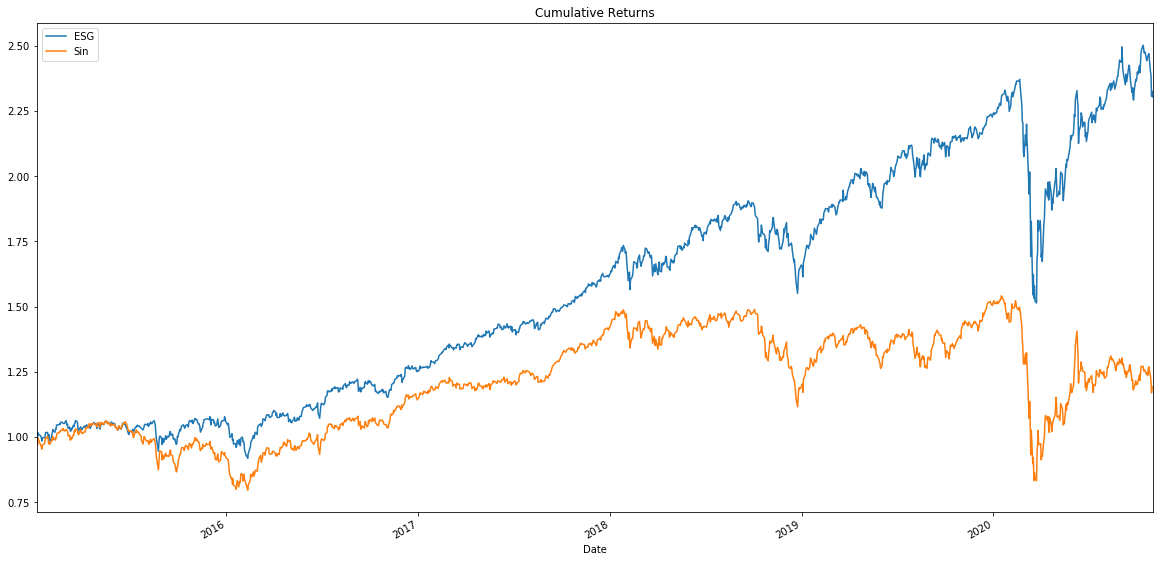

<Figure size 432x288 with 0 Axes>

In [101]:
# YOUR CODE HERE!


return_for_all_time_plot = pn.Column(return_for_all_time(), sharpe_for_all_time())
tab_return_for_fin_cris = pn.Column(return_for_fin_cris(),sharpe_for_fin_cris())
tab_return_for_flash_crash = pn.Column(return_for_flash_crash(),sharpe_for_flash_crash())
tab_return_for_brexit = pn.Column(return_for_brexit(),sharpe_for_brexit())
tab_return_for_gov_shut = pn.Column(return_for_gov_shut(),sharpe_for_gov_shut())
tab_return_for_yield_curve = pn.Column(return_for_yield_curv(),sharpe_for_yield_curve())
tab_return_for_covid = pn.Column(return_for_covid(),sharpe_for_covid())

panel = pn.Tabs(
    ("Home (All)", return_for_all_time_plot),
    ("Financial Crisis", tab_return_for_fin_cris),
    ("Flash Crash 2010", tab_return_for_flash_crash),
    ("Brexit 2016", tab_return_for_brexit),
    ("Gov Shutdown 2018", tab_return_for_gov_shut),
    ("Yield Curve Inversion 2019", tab_return_for_yield_curve),
    ("COVID Crash", tab_return_for_covid)
)

Tabs
    [0] Column
        [0] Matplotlib(Figure)
        [1] Matplotlib(Figure)
    [1] Column
        [0] Matplotlib(Figure)
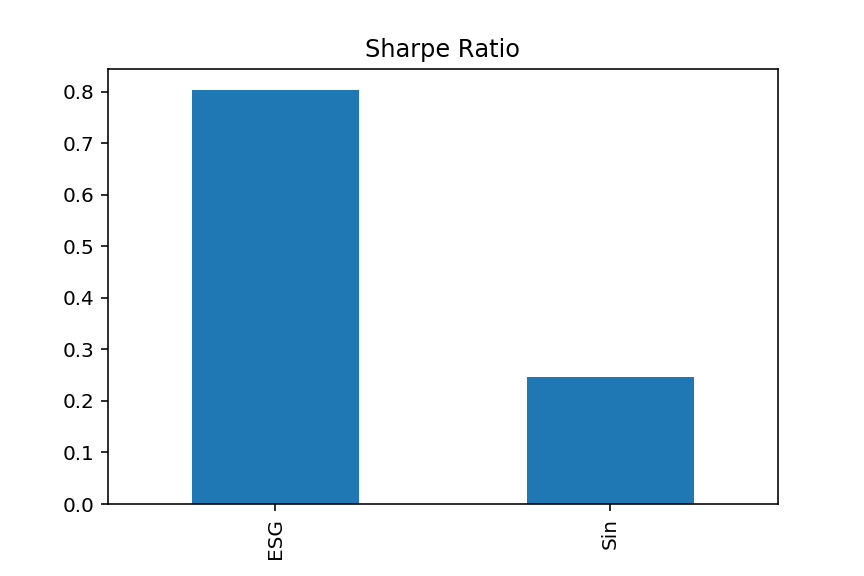
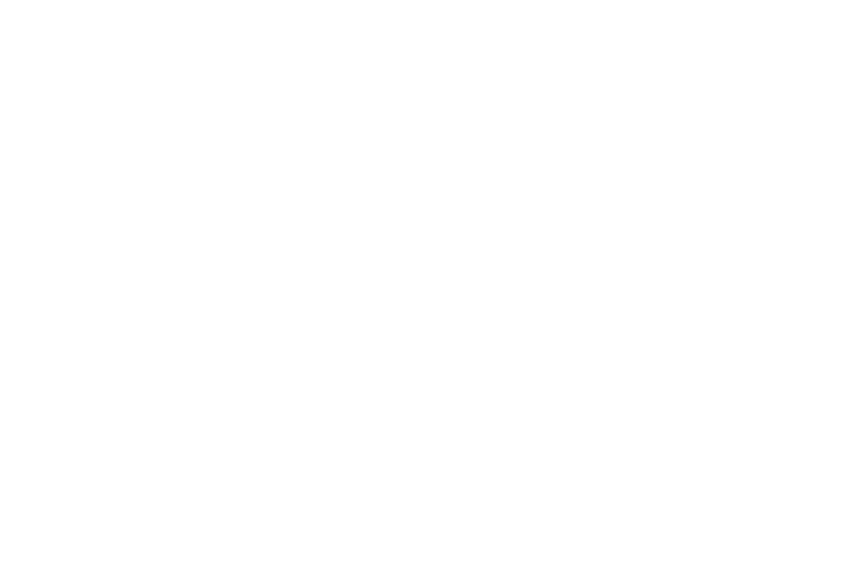
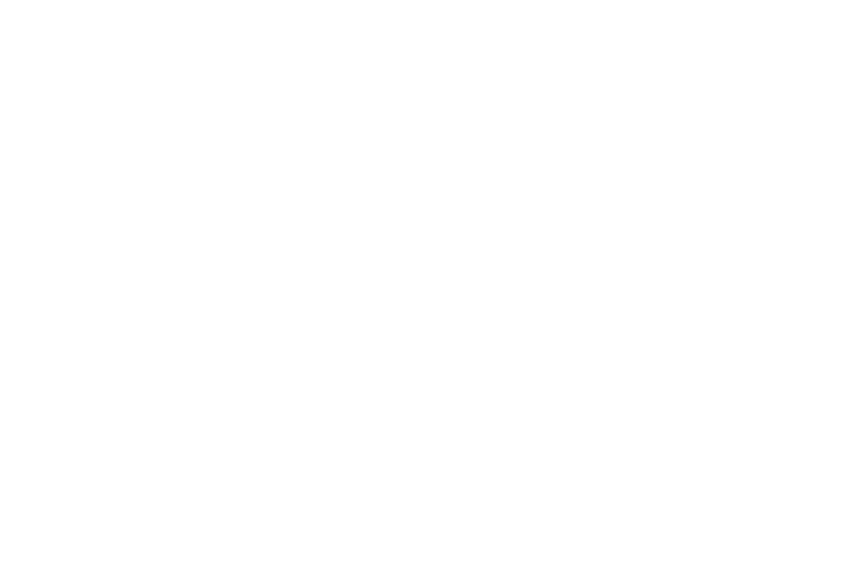

In [98]:
panel.servable()